In [2]:
import sys
import sklearn
import matplotlib
import numpy as np

print('Python version: {}'.format(sys.version))
print('Scikit-learn version:{}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('NumPy: {}'.format(np.__version__))

Python version: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
Scikit-learn version:0.24.2
Matplotlib: 3.4.2
NumPy: 1.19.5


In [6]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [7]:
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-13-9c95c5f793d7>:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


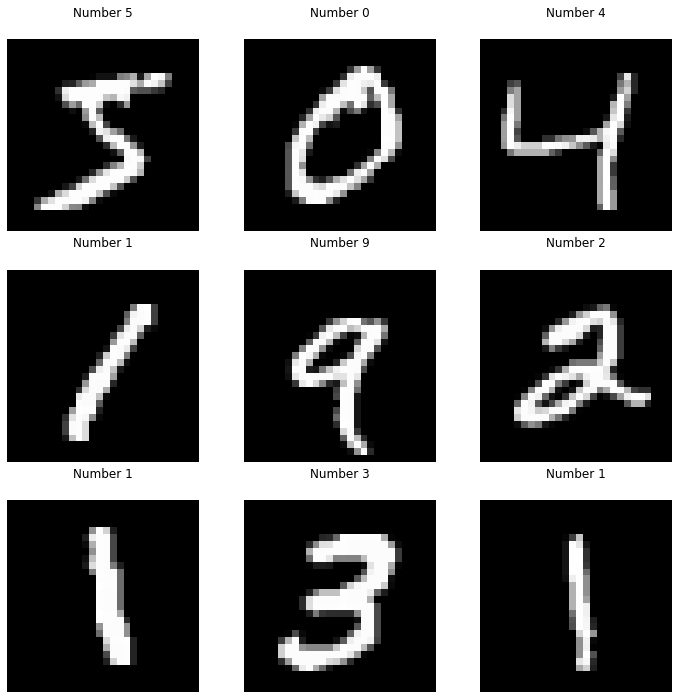

In [13]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
fig.show()

In [14]:
# pre-processing the images

X = x_train.reshape(len(x_train), -1)
Y = y_train

X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [15]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

kmeans = MiniBatchKMeans(n_clusters = n_digits)

kmeans.fit(X)

10


MiniBatchKMeans(n_clusters=10)

In [16]:
kmeans.labels_

array([3, 7, 6, ..., 6, 2, 8])

In [33]:
def infer_cluster_labels(kmeans, actual_labels):
   
    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        labels = []
        index = np.where(kmeans.labels_ == i)
        labels.append(actual_labels[index])

        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        
        if np.argmax(counts) in inferred_labels:           
            inferred_labels[np.argmax(counts)].append(i)
        else:            
            inferred_labels[np.argmax(counts)] = [i]

        
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    
    
    
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels
   

In [34]:
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[0 0 9 1 9 2 1 8 1 7 3 1 3 2 1 7 2 8 2 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [44]:
from sklearn import metrics
def calculate_metrics(estimator, data, labels):
    print('Number of clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [46]:
clusters = [10, 16, 32, 64, 144, 256]

for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    calculate_metrics(estimator, X, Y)
    
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    print('Accuracy : {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of clusters: 10
Inertia: 2436377.7749207686
Homogeneity: 0.41316695751780386
Accuracy : 0.5051

Number of clusters: 16
Inertia: 2220685.1158840656
Homogeneity: 0.5596519775674409
Accuracy : 0.6489666666666667

Number of clusters: 32
Inertia: 1990365.3611164717
Homogeneity: 0.6645521765693225
Accuracy : 0.7438166666666667

Number of clusters: 64
Inertia: 1810468.5952167078
Homogeneity: 0.7515945359439299
Accuracy : 0.82935

Number of clusters: 144
Inertia: 1632645.5771299081
Homogeneity: 0.808984262841654
Accuracy : 0.87465

Number of clusters: 256
Inertia: 1515560.6410774256
Homogeneity: 0.8382648114054355
Accuracy : 0.8898666666666667



In [47]:
X_test = x_test.reshape(len(x_test), -1)
X_test = X_test.astype(float) / 255.
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)
test_cluster = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.8996



<ipython-input-52-b170d0e553cc>:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


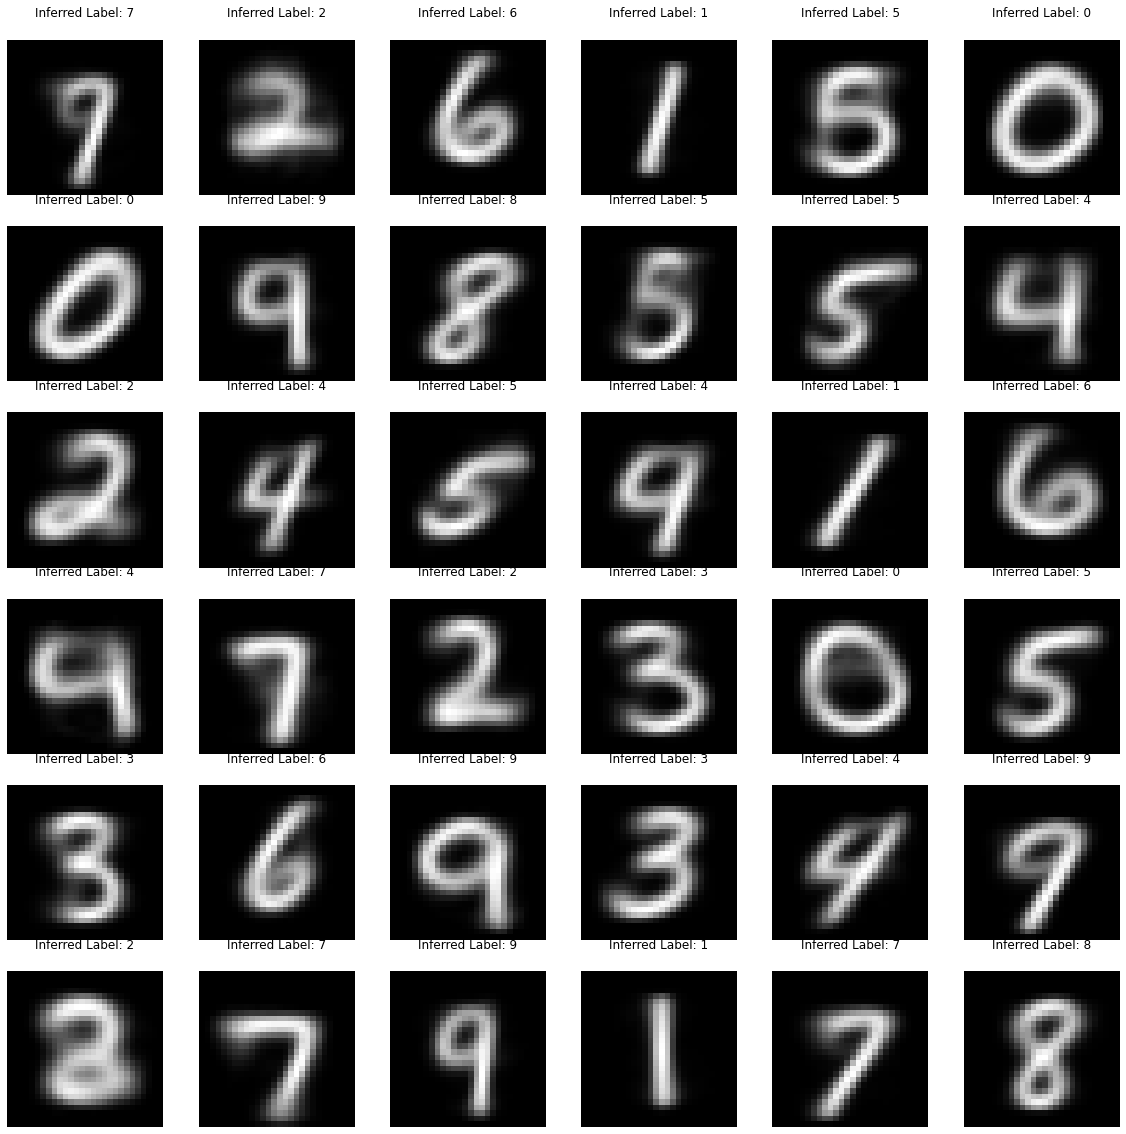

In [52]:

kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)


centroids = kmeans.cluster_centers_


images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)


cluster_labels = infer_cluster_labels(kmeans, Y)
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()


for i, ax in enumerate(axs.flat):
    
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
  
    ax.matshow(images[i])
    ax.axis('off')
    
fig.show()